In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np

from halotools.empirical_models import PrebuiltHodModelFactory
from halotools.sim_manager import CachedHaloCatalog
from halotools import sim_manager
from halotools.mock_observables import return_xyz_formatted_array
from halotools.mock_observables import wp
import halotools.sim_manager.sim_defaults as sim_defaults

sim_defaults.default_simname = 'multidark'

In [ ]:
# Download halo catalogs (only needs to be done once)
from halotools.sim_manager import DownloadManager
dman = DownloadManager()
dman.download_processed_halo_table('multidark', 'rockstar', 1.0) 

In [2]:
# default_halocat = sim_manager.CachedHaloCatalog() 
# zheng07_model = PrebuiltHodModelFactory('zheng07', threshold = -19.5, redshift = 0.0)
zheng07_model = PrebuiltHodModelFactory('zheng07', redshift = 1.0004)
# halocat = CachedHaloCatalog(simname = 'bolshoi', redshift = 0.0, halo_finder = 'rockstar')
halocat = CachedHaloCatalog(simname = 'multidark', halo_finder = 'rockstar', \
                            version_name = 'halotools_v0p4', redshift = 1.0004)
zheng07_model.populate_mock(halocat)

# sample
# zheng07_model.mock.galaxy_table[3]

/home/tjr63/miniconda3/envs/halotools_env/lib/python3.7/site-packages/halotools/empirical_models/phase_space_models/analytic_models/monte_carlo_helpers.py:205: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  self.rad_prof_func_table_indices[digitized_param_list]
/home/tjr63/miniconda3/envs/halotools_env/lib/python3.7/site-packages/halotools/empirical_models/phase_space_models/analytic_models/monte_carlo_helpers.py:522: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  self.rad_prof_func_table_indices[digitized_param_list]


In [5]:
rr, xi_cc, xi_cs, xi_ss = zheng07_model.compute_average_galaxy_clustering(\
                            gal_type = 'centrals', include_crosscorr = True, \
                            num_iterations = 3, num_threads = 'max') 

/home/tjr63/miniconda3/envs/halotools_env/lib/python3.7/site-packages/halotools/empirical_models/phase_space_models/analytic_models/monte_carlo_helpers.py:205: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  self.rad_prof_func_table_indices[digitized_param_list]
/home/tjr63/miniconda3/envs/halotools_env/lib/python3.7/site-packages/halotools/empirical_models/phase_space_models/analytic_models/monte_carlo_helpers.py:522: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  self.rad_prof_func_table_indices[digitized_param_list]
/home/tjr63/miniconda3

In [7]:
# https://halotools.readthedocs.io/en/latest/api/halotools.empirical_models.ModelFactory.html#halotools.empirical_models.ModelFactory.compute_average_galaxy_clustering
# "The compute_average_galaxy_clustering is simply a convenience function, and is not intended for use in performance-critical applications such as MCMCs"

rbins = np.linspace(45,200, num=50)

r, xi_gg = zheng07_model.compute_average_galaxy_clustering(rbins=rbins, simname='multidark')

/home/tjr63/miniconda3/envs/halotools_env/lib/python3.7/site-packages/halotools/empirical_models/phase_space_models/analytic_models/monte_carlo_helpers.py:205: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  self.rad_prof_func_table_indices[digitized_param_list]
/home/tjr63/miniconda3/envs/halotools_env/lib/python3.7/site-packages/halotools/empirical_models/phase_space_models/analytic_models/monte_carlo_helpers.py:522: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  self.rad_prof_func_table_indices[digitized_param_list]
/home/tjr63/miniconda3

<IPython.core.display.Javascript object>


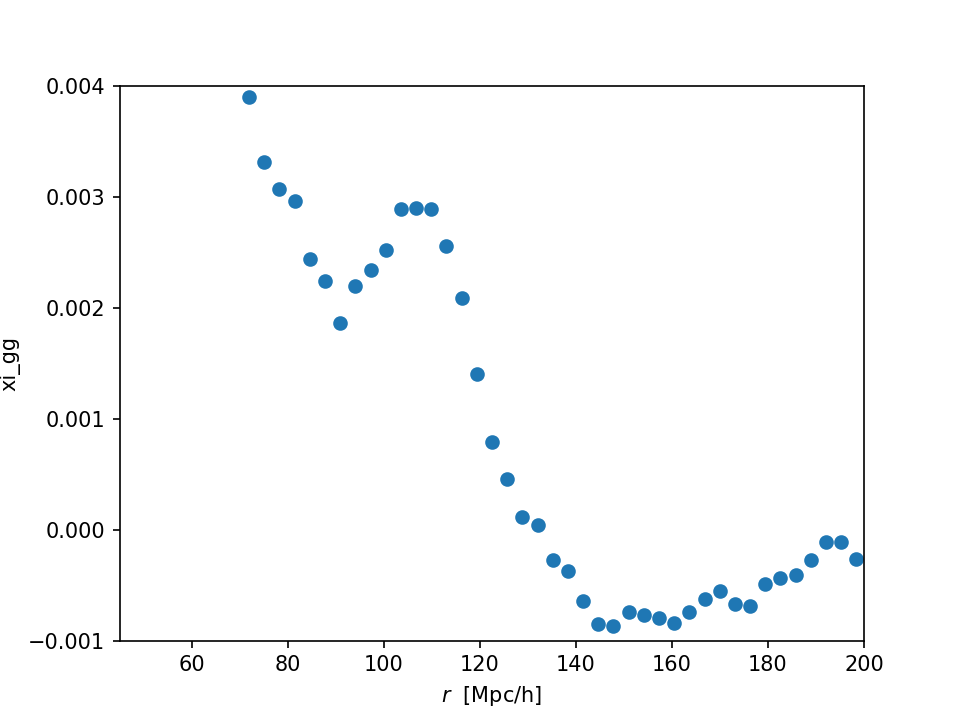

In [8]:
# Plot 3D correlation function

plt.figure()
plt.scatter(r,xi_gg)
# plt.loglog()
plt.axis([45,200, -0.001,0.004])
plt.xlabel(r'$r $  $\rm{[Mpc/h]}$')
plt.ylabel('xi_gg')
plt.show()

In [ ]:
rp_bins = np.logspace(-1,1.25,15)


In [9]:
# 2D correlation funciton, w_p
# following- https://halotools.readthedocs.io/en/latest/quickstart_and_tutorials/tutorials/catalog_analysis/galcat_analysis/basic_examples/clustering_examples/galaxy_catalog_analysis_tutorial4.html#galaxy-catalog-analysis-tutorial4
# and- https://halotools.readthedocs.io/en/latest/api/halotools.mock_observables.wp.html#halotools.mock_observables.wp
x = zheng07_model.mock.galaxy_table['x']
y = zheng07_model.mock.galaxy_table['y']
z = zheng07_model.mock.galaxy_table['z']
pos = return_xyz_formatted_array(x, y, z)


pi_max = 40.

w_p = wp(pos, rbins, pi_max, period=zheng07_model.mock.Lbox, num_threads='max')

<IPython.core.display.Javascript object>


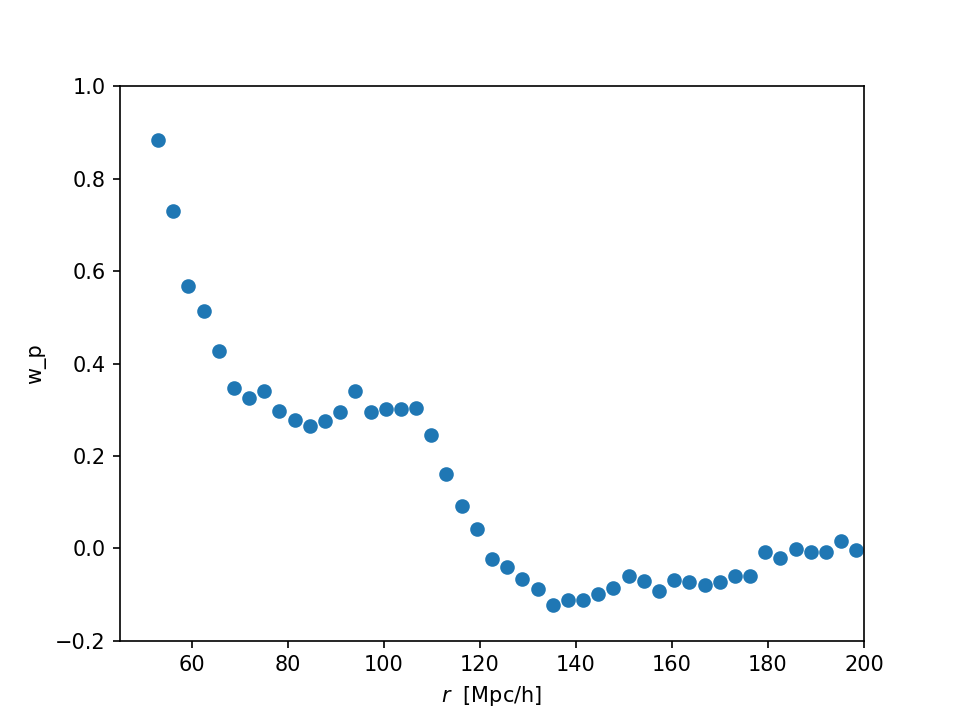

In [11]:
# Plot w_p
rp_bin_centers = (rbins[:-1] + rbins[1:])/2.

plt.figure()
plt.scatter(rp_bin_centers, w_p)
plt.axis([45,200, -0.2,1.])
plt.xlabel(r'$r $  $\rm{[Mpc/h]}$')
plt.ylabel('w_p')
plt.show()

In [ ]:
rp_bin_centers = (rbins[:-1] + rbins[1:])/2.
rbins[:-1]

In [ ]:
rp_bin_centers

In [ ]:
?zheng07_model.compute_average_galaxy_clustering

In [ ]:
?PrebuiltHodModelFactory